## Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

# read data

In [2]:
# path  = 'ex1data1.txt'
# data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
# data.head()

# data = pd.read_csv('../input/population-profit/Population_Profit.txt', header=None, names=['Population','Profit'])
# data.head()

data =pd.read_csv('Datasets/Population_Profit.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<function matplotlib.pyplot.show(close=None, block=None)>

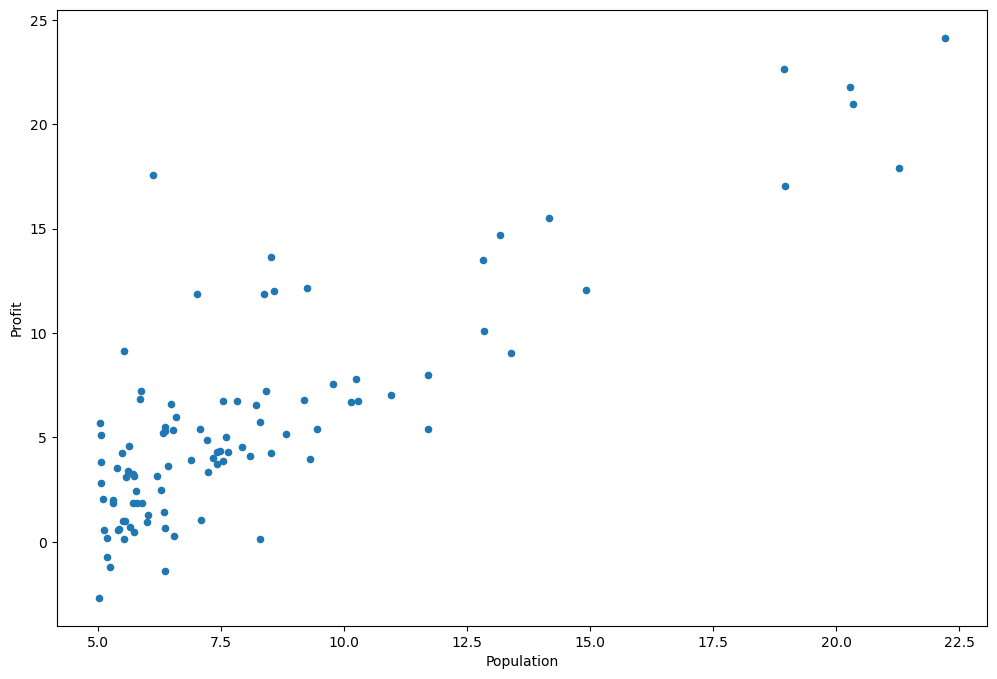

In [3]:
# visualizing the data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show

## Cost Function



In [4]:
# insert a column
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [5]:
# split data to X and Y
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

In [6]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [7]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [8]:
# convert X and Y into matrix
X = np.matrix(X.values)
Y = np.matrix(Y.values)

theta = np.matrix(np.array([0,0]))

X.shape, Y.shape, theta.shape


((98, 2), (98, 1), (1, 2))

formula of cost function
![](img/cost.png)

In [9]:
# cost function 
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T)-Y, 2)
    return np.sum(inner) / (2 * len(X))

In [10]:
computeCost(X, Y, theta)

31.81715114528776

## regularization
![](img/regularization.png)

In [11]:
def normalEqn(X, Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y
    return theta

In [12]:
theta = normalEqn(X,Y)
theta

matrix([[-3.91307391],
        [ 1.1936497 ]])

In [13]:
theta = theta.reshape(1,-1)
computeCost(X, Y, theta)

4.438588006718629

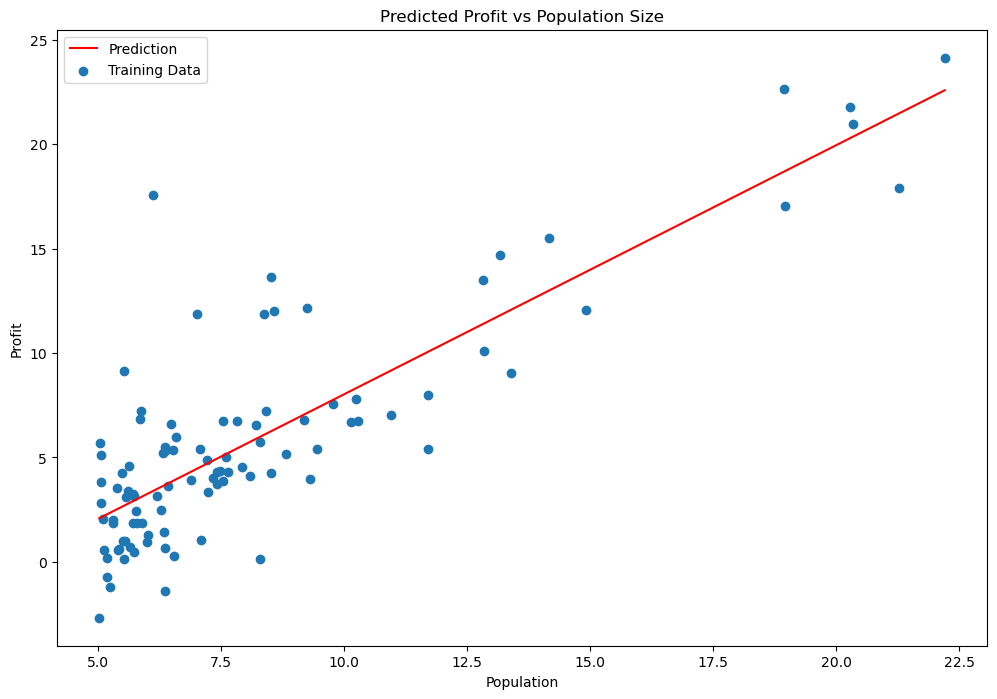

In [14]:
# fit image
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0, 0] +  theta[0, 1] * x

plt.figure(figsize = (12, 8))
plt.xlabel("Population")
plt.ylabel("Profit")
l1 = plt.plot(x, f, label="Prediction", color='red')
l2 = plt.scatter(data.Population, data.Profit, label="Training Data")
plt.legend(loc="best")
plt.title("Predicted Profit vs Population Size")
plt.show()